In [1]:
import numpy as np
import pandas as pd

features = np.load("preprocessed_data/sample/sequence_encoder/features.npy")
target = pd.read_csv("preprocessed_data/sample/sequence_encoder/target.csv")['label']
features_dev = np.load("preprocessed_data/sample/sequence_encoder/features_dev.npy")
target_dev = pd.read_csv("preprocessed_data/sample/sequence_encoder/target_dev.csv")['label']
features_test = np.load("preprocessed_data/sample/sequence_encoder/features_test.npy")
target_test = pd.read_csv("preprocessed_data/sample/sequence_encoder/target_test.csv")['label']

In [28]:
features_test

array([[18,  5,  9, ..., 16,  9,  5],
       [ 5,  2,  9, ...,  0,  0,  0],
       [ 1,  1,  7, ...,  5,  6,  8],
       ...,
       [ 3, 14,  2, ..., 10,  3, 18],
       [ 5, 11,  4, ..., 10,  7, 11],
       [ 1, 16,  3, ...,  1,  1, 10]])

As we can see above, the features are already preprocessed. Here we have the encoding aligned sequence with a maximum size of 250 characters. 

In [27]:
import tensorflow as tf

#Loading all our models
light_mobilnetv2_model = tf.keras.models.load_model('output/20240107-094325/args_light_mobilenetv2.h5')
mobilnetv2_model = tf.keras.models.load_model('output/20240107-021228/args_mobilenetv2.h5')
resnet_model = tf.keras.models.load_model('output/20240106-233950/args_resnet.h5')
LSTM_model = tf.keras.models.load_model('output/20240106-204014/args_LSTM.h5')

In [29]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report



test_pred_light_mobilnetv2 = light_mobilnetv2_model.predict(features_test)
print("test-acc = " + str(accuracy_score(target_test, np.argmax(test_pred_light_mobilnetv2, axis=1))))
test_pred_mobilnetv2 = mobilnetv2_model.predict(features_test)
print("test-acc = " + str(accuracy_score(target_test, np.argmax(test_pred_mobilnetv2, axis=1))))
test_pred_resnet = resnet_model.predict(features_test)
print("test-acc = " + str(accuracy_score(target_test, np.argmax(test_pred_resnet, axis=1))))
test_pred_LSTM = LSTM_model.predict(features_test)
print("test-acc = " + str(accuracy_score(target_test, np.argmax(test_pred_LSTM, axis=1))))



717/717 [==============================] - 233s 322ms/step
test-acc = 0.9998254570842606
717/717 [==============================] - 684s 772ms/step
test-acc = 0.9997381856263909
717/717 [==============================] - 476s 557ms/step
test-acc = 0.9999127285421303
717/717 [==============================] - 956s 1s/step
test-acc = 0.9947637125278178


In [49]:
print(classification_report(target_test, np.argmax(test_pred_light_mobilnetv2, axis=1)))
report = classification_report(target_test, np.argmax(test_pred_light_mobilnetv2, axis=1), output_dict=True)
df = pd.DataFrame.from_dict(report).transpose()
df.to_csv('output/20240107-094325/report_evaluation_light_mobilenetv2.csv', index=True)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        77
           1       1.00      1.00      1.00        84
           2       1.00      1.00      1.00       106
           3       1.00      1.00      1.00        69
           4       1.00      1.00      1.00        69
           5       1.00      1.00      1.00       133
           6       1.00      1.00      1.00       107
           7       1.00      1.00      1.00        91
           8       1.00      1.00      1.00       102
           9       1.00      1.00      1.00        85
          10       1.00      1.00      1.00        72
          11       1.00      1.00      1.00        83
          12       1.00      1.00      1.00        77
          13       1.00      1.00      1.00        74
          14       1.00      1.00      1.00        87
          15       1.00      1.00      1.00        68
          16       1.00      1.00      1.00        91
          17       1.00    

In [52]:
print(classification_report(target_test, np.argmax(test_pred_mobilnetv2, axis=1)))
report = classification_report(target_test, np.argmax(test_pred_mobilnetv2, axis=1), output_dict=True)
df = pd.DataFrame.from_dict(report).transpose()
df.to_csv('output/20240107-021228/report_evaluation_mobilenetv2.csv', index=True)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        77
           1       1.00      1.00      1.00        84
           2       1.00      1.00      1.00       106
           3       1.00      1.00      1.00        69
           4       1.00      1.00      1.00        69
           5       1.00      1.00      1.00       133
           6       1.00      1.00      1.00       107
           7       1.00      1.00      1.00        91
           8       1.00      1.00      1.00       102
           9       1.00      1.00      1.00        85
          10       1.00      1.00      1.00        72
          11       1.00      1.00      1.00        83
          12       1.00      1.00      1.00        77
          13       1.00      1.00      1.00        74
          14       1.00      1.00      1.00        87
          15       1.00      1.00      1.00        68
          16       1.00      1.00      1.00        91
          17       1.00    

In [51]:
print(classification_report(target_test, np.argmax(test_pred_resnet, axis=1)))
report = classification_report(target_test, np.argmax(test_pred_resnet, axis=1), output_dict=True)
df = pd.DataFrame.from_dict(report).transpose()
df.to_csv('output/20240106-233950/report_evaluation_resnet.csv', index=True)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        77
           1       1.00      1.00      1.00        84
           2       1.00      1.00      1.00       106
           3       1.00      1.00      1.00        69
           4       1.00      1.00      1.00        69
           5       1.00      1.00      1.00       133
           6       1.00      1.00      1.00       107
           7       1.00      1.00      1.00        91
           8       1.00      1.00      1.00       102
           9       1.00      1.00      1.00        85
          10       1.00      1.00      1.00        72
          11       1.00      1.00      1.00        83
          12       1.00      1.00      1.00        77
          13       1.00      1.00      1.00        74
          14       1.00      1.00      1.00        87
          15       1.00      1.00      1.00        68
          16       1.00      1.00      1.00        91
          17       1.00    

In [50]:
print(classification_report(target_test, np.argmax(test_pred_LSTM, axis=1)))
report = classification_report(target_test, np.argmax(test_pred_LSTM, axis=1), output_dict=True)
df = pd.DataFrame.from_dict(report).transpose()
df.to_csv('output/20240106-204014/report_evaluation_LSTM.csv', index=True)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99        77
           1       1.00      0.99      0.99        84
           2       1.00      0.99      1.00       106
           3       0.99      1.00      0.99        69
           4       1.00      0.99      0.99        69
           5       1.00      1.00      1.00       133
           6       0.99      1.00      1.00       107
           7       1.00      0.99      0.99        91
           8       0.99      1.00      1.00       102
           9       1.00      1.00      1.00        85
          10       0.99      1.00      0.99        72
          11       0.99      0.99      0.99        83
          12       0.99      1.00      0.99        77
          13       0.99      1.00      0.99        74
          14       0.97      0.99      0.98        87
          15       1.00      1.00      1.00        68
          16       1.00      1.00      1.00        91
          17       1.00    

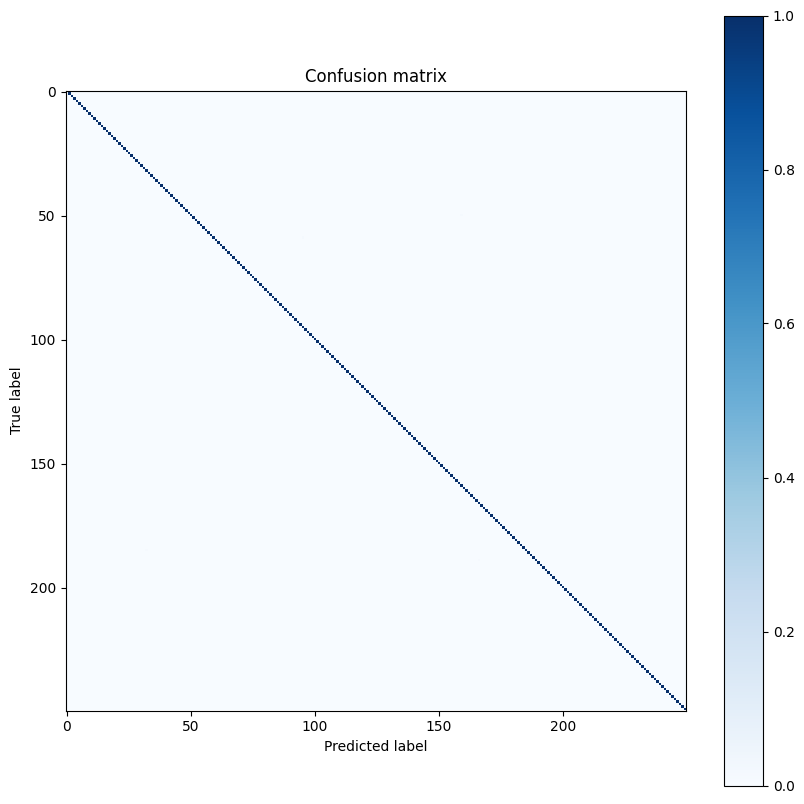

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        77
           1       1.00      1.00      1.00        84
           2       1.00      1.00      1.00       106
           3       1.00      1.00      1.00        69
           4       1.00      1.00      1.00        69
           5       1.00      1.00      1.00       133
           6       1.00      1.00      1.00       107
           7       1.00      1.00      1.00        91
           8       1.00      1.00      1.00       102
           9       1.00      1.00      1.00        85
          10       1.00      1.00      1.00        72
          11       1.00      1.00      1.00        83
          12       1.00      1.00      1.00        77
          13       1.00      1.00      1.00        74
          14       1.00      1.00      1.00        87
          15       1.00      1.00      1.00        68
          16       1.00      1.00      1.00        91
          17       1.00    

In [23]:
import matplotlib.pyplot as plt
# Compute confusion matrix
cm = confusion_matrix(target_test, np.argmax(test_pred, axis=1))

# Plot normalized confusion matrix
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
np.set_printoptions(precision=2)
plt.figure(figsize=(10,10))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion matrix')
plt.colorbar()
#tick_marks = np.arange(len(lb.classes_))
#plt.xticks(tick_marks, lb.classes_, rotation=90)
#plt.yticks(tick_marks, lb.classes_)
#for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
#    plt.text(j, i, format(cm[i, j], '.2f'), horizontalalignment="center", color="white" if cm[i, j] > cm.max() / 2. else "black")
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

print(classification_report(target_test, np.argmax(test_pred, axis=1)))

In [61]:
def plot_f1(test_pred, path_saving):
    plt.figure(figsize=(10,10))
    target_names = [f'class {i}' for i in range(250)]
    report = classification_report(target_test, np.argmax(test_pred, axis=1), output_dict=True, target_names=target_names)
    f1scores = []
    for i in range(250):
        f1scores.append(report[f"class {i}"]["f1-score"])
    plt.title('F1-score per class')
    plt.xlabel('Class')
    plt.ylabel('F1-score')
    plt.plot(f1scores)
    plt.savefig(path_saving)
    plt.show()

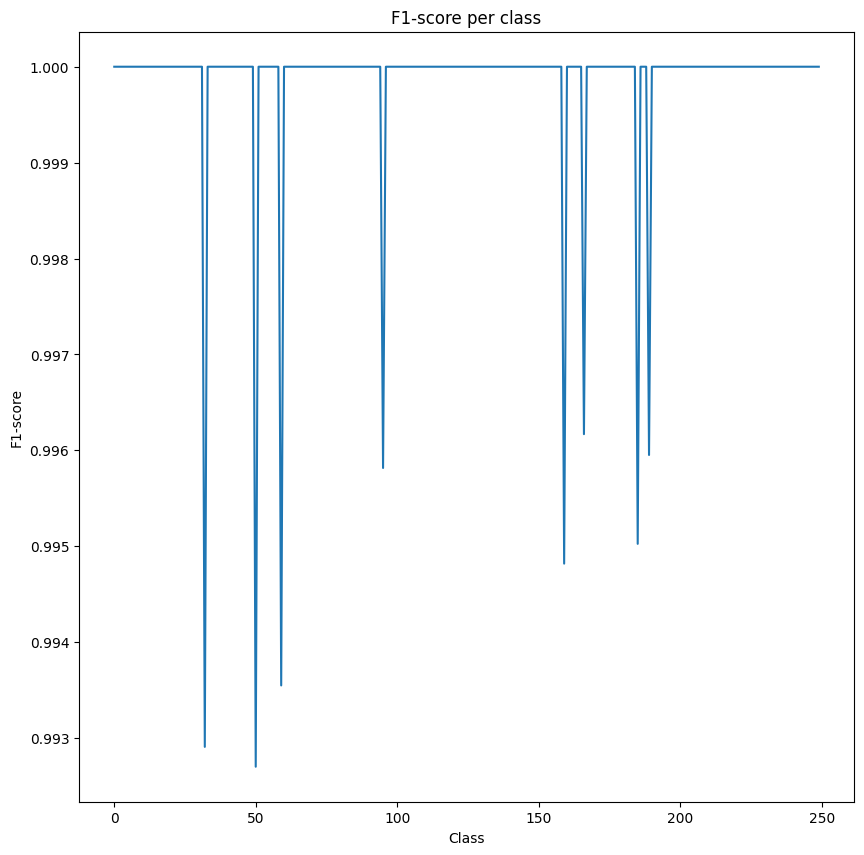

In [64]:
plot_f1(test_pred_light_mobilnetv2, 'output/20240107-094325/f1score_light_mobilenetv2.png')

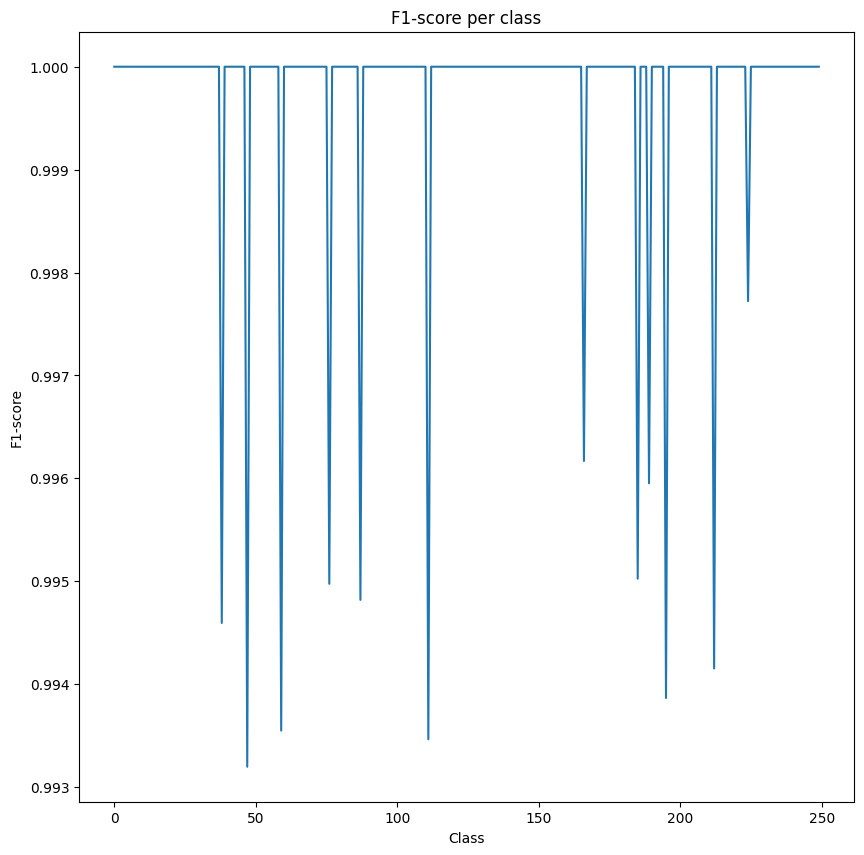

In [65]:
plot_f1(test_pred_mobilnetv2, 'output/20240107-021228/f1_score_per_class.png')

Mobilnet and MobilNet light are really similar, few classes still have some errors, but globally the learning is good as the minimum f1 is 0.993. 

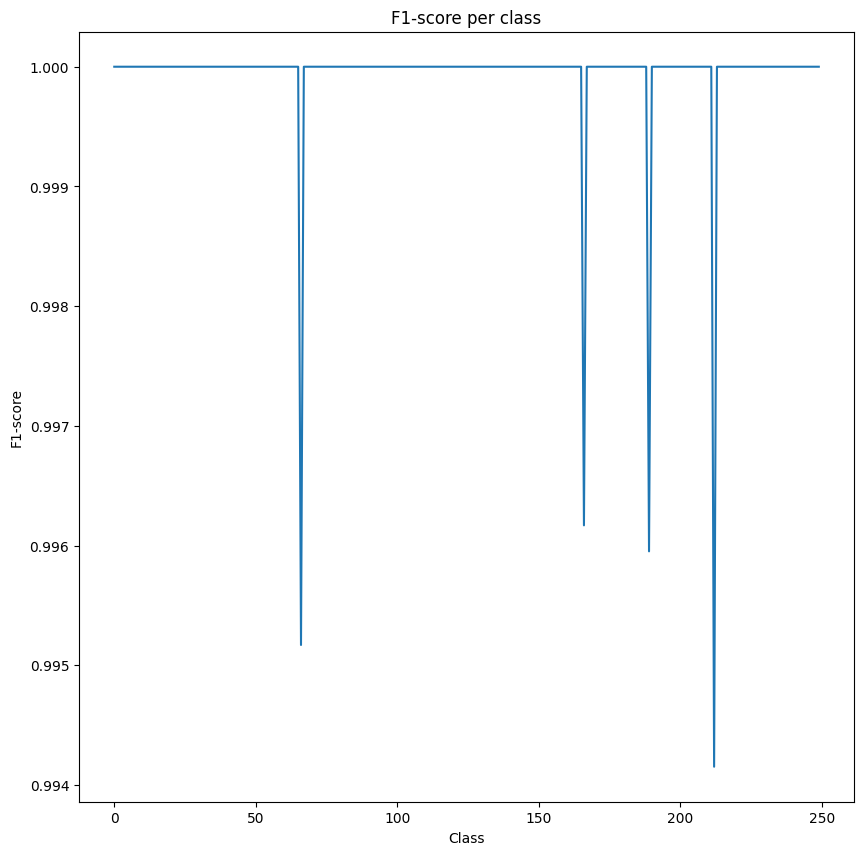

In [66]:
plot_f1(test_pred_resnet, 'output/20240106-233950/f1_score_per_class.png')

The resnet almost learned perfectly all the classes, only 4 of them have some error with a minimum f1 at 0.995. This model seems promising. 

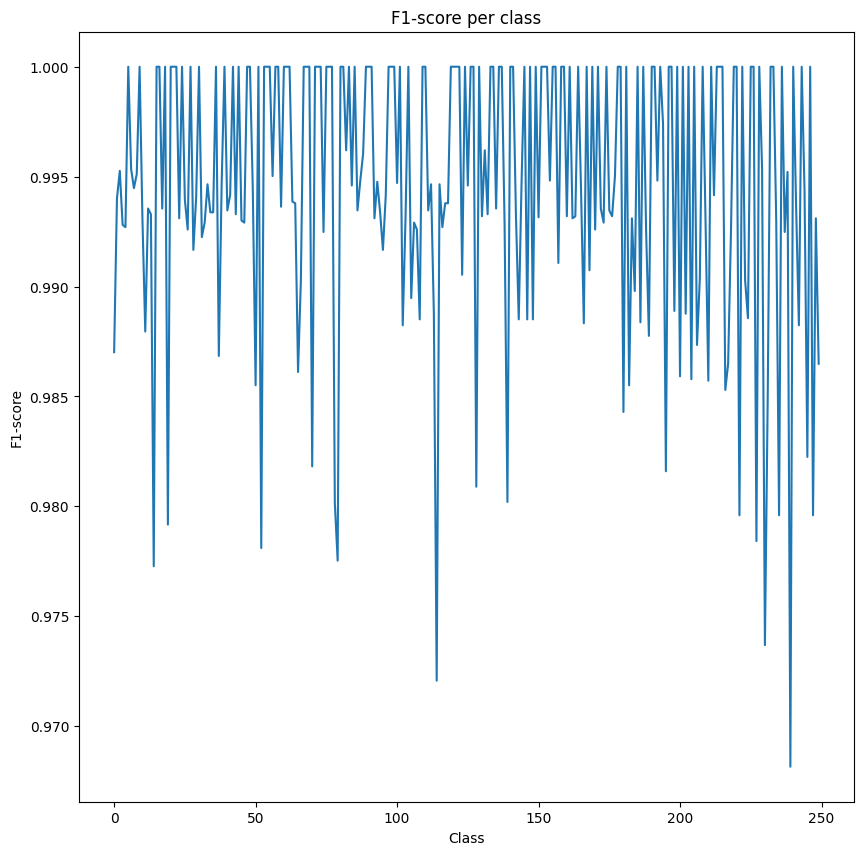

In [67]:
plot_f1(test_pred_LSTM, 'output/20240106-204014/f1_score_per_class.png')


LSTM seems to have more troubles to learn from all classes. But the results remains really good.

The above plots (one for each model) shows the f1-score for each of our 250 classes evaluated on the test dataset. The results are very promissing for all the model, globally we have two trends : 
- LSTM : still have error on a large number of classes, but the overall results remains really good. 
- Mobilnetv2, Mobilnetv2_light and ResNet : perform very well, almost perfect, but some class still have few errors. The overall results remains really good

Globally, ther. In conlusion, it is possible to classify protiens from their amino acid sequence using machine learning provided the problem is properly setup and we have the a good enough balanced dataset for training.


- Mobilnetv2_light : 0.9998254570842606
- Mobilnetv2 : 0.9997381856263909
- Resnet : 0.9999127285421303
- LSTM: 0.9947637125278178

All of them have almost perfect results. We know that this results are made thanks to the data sampling, which lead to a perfect well-balanced training dataset. However, we show that it is possible to use "aligned sequence" for prediction, and that's great, because papers are usually talking about sequence only. Moreover, we sampled the aligned sequence at a very low rate 250 character (againt 500, because of computing power). Finally, we succeed to prove that deep learning and sequence ALIGNED encoding could be use for protein classification. 

